In [37]:
import sklearn as sk
import sklearn.covariance as cov
import pandas as pd
import numpy as np
import ggplot as gg

In [38]:
import sklearn.preprocessing as pre
from DataFrameImputer import DataFrameImputer

In [39]:
# Import and replace NaNs with most frequent value for labels and mean for numericals
train_original = pd.DataFrame.from_csv("train.csv")
test_original = pd.DataFrame.from_csv("test.csv")
lenght_train = len(train_original)
total = train_original.append(test_original)
total['SalePrice'] = total['SalePrice'].fillna(value=0) # don't impute price of the test data

total_dframe = DataFrameImputer().fit_transform(total)

In [40]:
gg.ggplot(train_original, gg.aes(y='SalePrice',x='')) +  gg.geom_boxplot()

Exception: Invalid column: ''
did you mean one of the following:


In [41]:
# Nachbarschaft
nbh_score = {None: 0, "CollgCr": 2, "Veenker": 2, "Crawfor": 2, "NoRidge": 3, "Mitchel": 1, "Somerst":2, "NWAmes":2 , "OldTown":1, "BrkSide":1, "Sawyer":1, "NridgHt":3, "NAmes":1 , "SawyerW":2 , "IDOTRR":1, "MeadowV":1, "Edwards":1, "Timber":2, "Gilbert":2, "StoneBr":3 , "ClearCr":2, "NPkVill":1, "Blmngtn":2, "BrDale":1 , "SWISU":1, "Blueste":1}

total_dframe['nbh_score'] = total_dframe['Neighborhood'].map(nbh_score)

In [42]:
# Data Generation
loudness_zoning = {'A': 1,#Agriculture
       'C': 5,#Commercial
       'C (all)': 5, #Fuck-up            
       'FV': 3,#Floating Village Residential
       'I': 7,#Industrial
       'RH': 5,#Residential High Density
       'RL': 4,#Residential Low Density
       'RP': 2,#Residential Low Density Park 
       'RM': 5,#Residential Medium Density
                 }

loudness_condition = {
    'Artery':4 ,   #Adjacent to arterial street
       'Feedr':2 ,    # Adjacent to feeder street   
       'Norm':0 ,     #  Normal 
       'RRNn':2 ,     #Within 200' of North-South Railroad
       'RRAn':2 ,     #Adjacent to North-South Railroad
       'PosN':-2 ,     #Near positive off-site feature--park, greenbelt, etc.
       'PosA':-4 ,     #Adjacent to postive off-site feature
       'RRNe':2 ,     #Within 200' of East-West Railroad
       'RRAe':2 ,     #Adjacent to East-West Railroad
}

loudness_fence = {
     'GdPrv': 1,	#Good Privacy
       'MnPrv': 0,	#Minimum Privacy
       'GdWo': 0,	#Good Wood
       'MnWw': 0,	#Minimum Wood/Wire
       'NA': 0,	#No Fence
}

total_dframe['gen_loudness'] = total_dframe['Fence'].map(loudness_fence) + total_dframe['MSZoning'].map(loudness_zoning)+total_dframe['Condition1'].map(loudness_condition)+total_dframe['Condition2'].map(loudness_condition)

In [43]:
transportation_score = {
     'Artery': 2,   #Adjacent to arterial street
       'Feedr': 1,    # Adjacent to feeder street   
       'Norm': 0,     #  Normal 
       'RRNn': 1,     #Within 200' of North-South Railroad
       'RRAn': 2,     #Adjacent to North-South Railroad
       'PosN': 0,     #Near positive off-site feature--park, greenbelt, etc.
       'PosA': 0,     #Adjacent to postive off-site feature
       'RRNe': 1,     #Within 200' of East-West Railroad
       'RRAe': 2,     #Adjacent to East-West Railroad
}
total_dframe['gen_transport'] = total_dframe['Condition1'].map(transportation_score) + total_dframe['Condition2'].map(transportation_score)

In [44]:
type_score = {
        'WD': 0, #Warranty Deed - Conventional
       'CWD': 0,	#Warranty Deed - Cash
       'VWD': 0,	#Warranty Deed - VA Loan
       'New': 4,	#Home just constructed and sold
       'COD': 0,	#Court Officer Deed/Estate
       'Con': 2,	#Contract 15% Down payment regular terms
       'ConLw': 1,	#Contract Low Down payment and low interest
       'ConLI': 1,	#Contract Low Interest
       'ConLD': 1,	#Contract Low Down
       'Oth': 0,	#Other
}

condition_score = {
        'Normal': 0,	#Normal Sale
       'Abnorml': -1,	#Abnormal Sale -  trade, foreclosure, short sale
       'AdjLand':-1 ,	#Adjoining Land Purchase
       'Alloca': 0,	#Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       'Family': -1,	#Sale between family members
       'Partial': 2,	#Home was not completed when last assessed (associated with New Homes)
}

total_dframe['gen_discount'] = total_dframe['SaleType'].map(type_score) + total_dframe['SaleCondition'].map(condition_score)

In [45]:
park_score = {
     'Artery': -1,   #Adjacent to arterial street
       'Feedr': -1,    # Adjacent to feeder street   
       'Norm': 0,     #  Normal 
       'RRNn': 0,     #Within 200' of North-South Railroad
       'RRAn': -1,     #Adjacent to North-South Railroad
       'PosN': 1,     #Near positive off-site feature--park, greenbelt, etc.
       'PosA': 2,     #Adjacent to postive off-site feature
       'RRNe': 0,     #Within 200' of East-West Railroad
       'RRAe': -1,     #Adjacent to East-West Railroad
}

total_dframe['gen_parkness'] = total_dframe['Condition1'].map(park_score) + total_dframe['Condition2'].map(park_score)

In [46]:
total_dframe['gen_electrical_quality'] = total_dframe['Electrical'].map(lambda x:x=='SBrkr')

In [47]:
total_dframe['gen_total_porch'] = total_dframe['OpenPorchSF']*0.7 + total_dframe['EnclosedPorch']+ total_dframe['3SsnPorch']*1.2+total_dframe['ScreenPorch']

In [48]:
foundation_score = {'BrkTil': 0,	#Brick & Tile
       'CBlock': 1,	#Cinder Block
       'PConc': 2,	#Poured Contrete	
       'Slab': 0,	#Slab
       'Stone': 0,	#Stone
       'Wood': 1,	#Wood
                   }
total_dframe['gen_foundation'] = total_dframe['Foundation'].map(foundation_score)

In [49]:
story_score = {
        '1Story': 1,	#One story
       '1.5Fin': 1,	#One and one-half story: 2nd level finished
       '1.5Unf': 1,	#One and one-half story: 2nd level unfinished
       '2Story': 2,	#Two story
       '2.5Fin': 2.1,	#Two and one-half story: 2nd level finished
       '2.5Unf': 1,	#Two and one-half story: 2nd level unfinished
       'SFoyer': 1,	#Split Foyer
       'SLvl': 1.5,	#Split Level
}

total_dframe['gen_story'] = total_dframe['HouseStyle'].map(story_score)

In [95]:
dwelling_score = {'1Fam': 1,	#Single-family Detached	
       '2fmCon': 0,	#Two-family Conversion; originally built as one-family dwelling
       'Duplex': 0,	#Duplex
       'TwnhsE': 1,	#Townhouse End Unit
       'Twnhs': 0,	#Townhouse Inside Unit
        }
total_dframe['gen_dwelling'] = total_dframe['BldgType'].map(dwelling_score)      
np.unique(total_dframe['BldgType'])

array(['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'], dtype=object)

In [51]:
lot_config_score = {'Inside': 0,	#Inside lot
       'Corner': 0,	#Corner lot
       'CulDSac': 1,	#Cul-de-sac
       'FR2': 1,	#Frontage on 2 sides of property
       'FR3': 0,	#Frontage on 3 sides of property
                   }
total_dframe['gen_lot_config'] = total_dframe['LotConfig'].map(lot_config_score) 

In [52]:
shape_score = {'Reg': 1,	#Regular	
       'IR1': 0,	#Slightly irregular
       'IR2': 0,	#Moderately Irregular
       'IR3': 0,	#Irregular
              }
total_dframe['gen_shape'] = total_dframe['LotShape'].map(shape_score)              

In [65]:
zoning_score={'A':0, 	#Agriculture
       'C (all)':0, 	#Commercial
       'FV':1,	#Floating Village Residential
       'I':0, 	#Industrial
       'RH':0, 	#Residential High Density
       'RL':1, 	#Residential Low Density
       'RP':0, 	#Residential Low Density Park 
       'RM':0, 	#Residential Medium Density
             }
total_dframe['gen_zoning'] = total_dframe['MSZoning'].map(zoning_score) 

In [54]:
# Sub Class Scoring
subclass_score = {}

d = np.array(total_dframe['MSSubClass'])

for subclass in np.unique(d):
    subclass_score[subclass] = total_dframe['SalePrice'][d == subclass].mean()
    
subclass_score[150] = subclass_score[120]

total_dframe['gen_subclass'] = total_dframe['MSSubClass'].map(subclass_score) 

In [55]:
def ascending(set, na=None):
    types = zip(set, range(1, len(set) + 1))

    if na != None:  # if there is a 'not appllicable' classification, generate an array with a 'has' and 'label' quality
        types = map(lambda x: [x[0], 1, x[1]], types)
        types.append([na, 0, 0])

    return dict(types)

In [56]:
# Label Properties
special = ['MoSold', 'YrSold','SalePrice']

already_numerical = ['nbh_score','LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
                     'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
                     'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
                     'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                     'GarageArea', 'WoodDeckSF',
                     'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','OverallQual', 'OverallCond',
                    'gen_discount','gen_transport','gen_loudness', 'gen_total_porch', 'gen_parkness','gen_electrical_quality',
                    'gen_foundation','gen_story', 'gen_dwelling','gen_lot_config','gen_shape','gen_zoning',
                    'gen_subclass']

default = ['Ex', 'Gd', 'TA', 'Fa', 'Po']
ordered = {
    'LandContour': ['Low', 'Lvl', 'Bnk', 'HLS'],
    'Utilities': ['AllPub', 'NoSewr', 'NoSeWa', 'ELO'],
    'LandSlope': ['Gtl', 'Mod', 'Sev'],
    'ExterQual': default,
    'ExterCond': default,
    'BsmtQual': default,  # has an NA
    'BsmtCond': default,  # has an NA
    'BsmtExposure': ['Gd', 'Av', 'Mn', 'No'],  # has an NA
    'BsmtFinType1': ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf'],  # NA
    'BsmtFinType2': ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf'],
    'HeatingQC': default,
    'KitchenQual': default,
    'Functional': ['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal'],
    'FireplaceQu': default,  # NA
    'GarageFinish': ['Fin', 'RFn', 'Unf'],  # NA
    'GarageQual': default,  # NA
    'GarageCond': default,  # NA
    'PavedDrive': ['Y', 'P', 'N'],
    'PoolQC': default,  # NA
    'Fence': ['GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'NA'],
}

unordered = [ 'Street',

              
               'MasVnrType',
             'CentralAir', 'GarageType', 
             
             'Exterior1st', 'Exterior2nd'
             ]

# gone: 'Neighborhood',

In [57]:
# unsure
# Alley, Street

removed = ['Heating', 'SaleCondition','SaleType','MiscFeature','Electrical','Foundation', 'RoofMatl',
          'RoofStyle','HouseStyle', 'BldgType', 'Condition1', 'Condition2','LotConfig','LotShape','Alley','MSZoning','MSSubClass']

In [58]:
# check for all colummns
assert set.intersection(set(already_numerical),set(ordered.keys())) == set()
assert set.intersection(set(unordered),set(ordered.keys())) == set()
assert set.intersection(set(unordered),set(already_numerical)) == set()

In [18]:
all_columns = set(removed + special + already_numerical + list(ordered.keys()) + unordered)
assert all_columns.symmetric_difference(set(total_dframe.columns))==set()

AssertionError: 

In [96]:
data = pd.DataFrame()

data['SalePrice'] = total_dframe['SalePrice'] # make price the first entry
data['SellDate'] = total_dframe['YrSold']+total_dframe['MoSold']/12

In [97]:
for item in already_numerical:
    data[item] = total_dframe[item]

In [98]:
for item in ordered: # enumerate keys
    d = ascending(ordered[item])
    data[item] = list(map(lambda x:d[x],total_dframe[item]))

In [99]:
lable_binarizer = dict()
for item in unordered:
    lb = pre.LabelBinarizer()
    lable_binarizer[item] = lb #save for later decoding
    
    new_columns = lb.fit_transform(total_dframe[item])
    for class_,content in zip(lb.classes_, new_columns.T):
        data[item+" "+str(class_)] = content

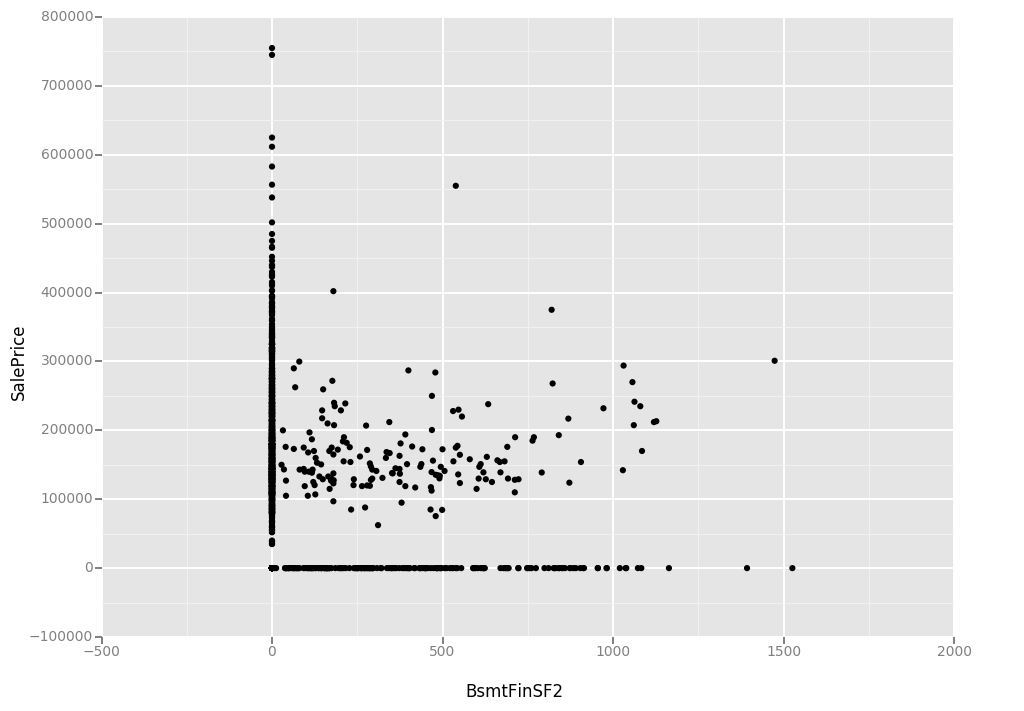

<ggplot: (-9223363296709166283)>

In [100]:
np.count_nonzero(data['BsmtFinSF2'])/len(data)

gg.ggplot(data,gg.aes(x='BsmtFinSF2',y='SalePrice')) + gg.geom_point()

In [101]:
# exteriör summary
data['ExAsbShng'] = data[ ["Exterior1st AsbShng" , "Exterior2nd AsbShng"]].max(axis=1)
del data['Exterior1st AsbShng']
del data['Exterior2nd AsbShng']

data['AsphShn'] = data[ ["Exterior1st AsphShn" , "Exterior2nd AsphShn"]].max(axis=1)
del data['Exterior1st AsphShn']
del data['Exterior2nd AsphShn']

data['ExBrkComm'] = data[["Exterior1st BrkComm" , "Exterior2nd Brk Cmn"]].max(axis=1)
del data['Exterior1st BrkComm']
del data['Exterior2nd Brk Cmn']

data['ExBrkFace'] = data[["Exterior1st BrkFace" , "Exterior2nd BrkFace"]].max(axis=1)
del data['Exterior1st BrkFace']
del data['Exterior2nd BrkFace']

data['ExCBlock'] = data[["Exterior1st CBlock" , "Exterior2nd CBlock"]].max(axis=1)
del data['Exterior1st CBlock']
del data['Exterior2nd CBlock']

data['ExCemntBd'] = data[["Exterior1st CemntBd" , "Exterior2nd CmentBd"]].max(axis=1)
del data['Exterior1st CemntBd']
del data['Exterior2nd CmentBd']

data['ExHdBoard'] = data[["Exterior1st HdBoard" , "Exterior2nd HdBoard"]].max(axis=1)
del data['Exterior1st HdBoard']
del data['Exterior2nd HdBoard']

data['ExImStucc'] = data[["Exterior1st ImStucc" , "Exterior2nd ImStucc"]].max(axis=1)
del data['Exterior1st ImStucc']
del data['Exterior2nd ImStucc']

data['ExMetalSd'] = data[["Exterior1st MetalSd" , "Exterior2nd MetalSd"]].max(axis=1)
del data['Exterior1st MetalSd']
del data['Exterior2nd MetalSd']

data['ExPlywood'] = data[["Exterior1st Plywood" , "Exterior2nd Plywood"]].max(axis=1)
del data['Exterior1st Plywood']
del data['Exterior2nd Plywood']

data['ExStone'] = data[["Exterior1st Stone" , "Exterior2nd Stone"]].max(axis=1)
del data['Exterior1st Stone']
del data['Exterior2nd Stone']

data['ExStucco'] = data[["Exterior1st Stucco" , "Exterior2nd Stucco"]].max(axis=1)
del data['Exterior1st Stucco']
del data['Exterior2nd Stucco']

data['ExVinylSd'] = data[["Exterior1st VinylSd" , "Exterior2nd VinylSd"]].max(axis=1)
del data['Exterior1st VinylSd']
del data['Exterior2nd VinylSd']

data['ExWdSdng'] = data[["Exterior1st Wd Sdng" , "Exterior2nd Wd Sdng"]].max(axis=1)
del data['Exterior1st Wd Sdng']
del data['Exterior2nd Wd Sdng']

data['ExWdShng'] = data[["Exterior1st WdShing" , "Exterior2nd Wd Shng"]].max(axis=1)
del data['Exterior1st WdShing']
del data['Exterior2nd Wd Shng']


In [107]:


#names = data.columns
#sets = np.transpose(data.values)
#corrvalues = np.corrcoef(sets)[0]
#corr_set = pd.Series(-np.abs(corrvalues), names)
#print(corr_set.sort_values())

#chosen = corr_set.sort_values().head(75).index

#data_neu = pd.DataFrame()

#for item in chosen:
#    data_neu[item] = data[item]
        

In [102]:
train = data[0:lenght_train]
test = data[lenght_train:]

train.to_csv("cleaned_train.csv")
test.to_csv("cleaned_test.csv")

In [82]:
train.as_matrix()

array([[208500.0, 2008.1666666666667, 2, ..., 1, 0, 0],
       [181500.0, 2007.4166666666667, 2, ..., 0, 0, 0],
       [223500.0, 2008.75, 2, ..., 1, 0, 0],
       ..., 
       [266500.0, 2010.4166666666667, 2, ..., 0, 0, 0],
       [142125.0, 2010.3333333333333, 1, ..., 0, 0, 0],
       [147500.0, 2008.5, 1, ..., 0, 0, 0]], dtype=object)